In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [15]:
url = 'https://www.worldometers.info/coronavirus/'# Create object page
page = requests.get(url)

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID Live - Coronavirus Statistics - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"
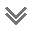

In [16]:
soup = BeautifulSoup (page.text, 'lxml')
soup

In [17]:
table1 = soup.find('table', id='main_table_countries_today')
table1

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [18]:
headers= []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)

In [19]:
headers[13]='Tests/1M pop'

In [20]:
mydata = pd.DataFrame(columns = headers)

In [21]:
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length]= row

In [23]:
mydata.drop(mydata.index[0:7], inplace=True)
mydata.drop(mydata.index[222:229], inplace=True)
mydata.reset_index(inplace=True, drop=True)# Drop “#” column
mydata.drop('#', inplace=True, axis=1)

In [25]:
# Export to csv
mydata.to_csv('covid_data.csv', index=False)
# Try to read csv
mydata2 = pd.read_csv('covid_data.csv')

In [26]:
mydata2

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639",...,"831,106,087","2,488,788","333,940,077",North America,6,390,0.0,"1,272",3.00,"50,907"
2,India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",...,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2.0,101,0.01,346
3,Brazil,"22,395,322",NaN,"619,730",NaN,"21,567,845",NaN,"207,747","8,318","104,239",...,"63,776,166","296,846","214,845,887",South America,10,347,3.0,NaN,NaN,967
4,UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425",...,"418,708,539","6,119,170","68,425,705",Europe,5,457,0.0,"2,605",3.00,"49,321"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saint Helena,2,NaN,,NaN,2,NaN,0,NaN,328,...,NaN,NaN,"6,104",Africa,"3,052",NaN,NaN,NaN,NaN,NaN
222,Total:,"10,116,200","+33,668","231,320",+232,"8,926,971","+24,523","957,909","2,379",NaN,...,NaN,NaN,NaN,Africa,,NaN,NaN,NaN,NaN,NaN
223,Total:,"929,096","+78,444","4,592",+20,"498,411",+164,"426,093",304,NaN,...,NaN,NaN,NaN,Australia/Oceania,,NaN,NaN,NaN,NaN,NaN
224,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN


In [27]:
import numpy as np 
 

In [28]:
mydata.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",...,,,,All,\n,,,,,
1,USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639",...,"831,106,087","2,488,788","333,940,077",North America,6,390,0,"1,272",3,"50,907"
2,India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",...,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2,101,0.01,346
3,Brazil,"22,395,322",,"619,730",,"21,567,845",,"207,747","8,318","104,239",...,"63,776,166","296,846","214,845,887",South America,10,347,3,,,967
4,UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425",...,"418,708,539","6,119,170","68,425,705",Europe,5,457,0,"2,605",3,"49,321"


In [29]:
mydata.info

<bound method DataFrame.info of     Country,Other   TotalCases    NewCases TotalDeaths NewDeaths  \
0           World  302,658,170  +1,893,100   5,494,963    +4,846   
1             USA   59,988,822    +424,706    857,104     +1,002   
2           India   35,367,760    +141,374    483,193        +15   
3          Brazil   22,395,322                619,730              
4              UK   14,193,228    +178,250    149,744       +229   
..            ...          ...         ...         ...       ...   
221  Saint Helena            2                                     
222        Total:   10,116,200     +33,668     231,320      +232   
223        Total:      929,096     +78,444       4,592       +20   
224        Total:          721                      15             
225        Total:  302,658,170  +1,893,100   5,494,963    +4,846   

    TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0      258,077,654     +548,454  39,085,553           92,444          

In [30]:
mydata.columns

Index(['Country,Other', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop',
       'Population', 'Continent', '1 Caseevery X ppl', '1 Deathevery X ppl',
       '1 Testevery X ppl', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M pop'],
      dtype='object')

In [31]:
mydata.shape

(226, 21)

In [38]:
mydata.NewCases

0      +1,893,100
1        +424,706
2        +141,374
3                
4        +178,250
          ...    
221              
222       +33,668
223       +78,444
224              
225    +1,893,100
Name: NewCases, Length: 226, dtype: object

In [39]:
mydata.dtypes

Country,Other          object
TotalCases             object
NewCases               object
TotalDeaths            object
NewDeaths              object
TotalRecovered         object
NewRecovered           object
ActiveCases            object
Serious,Critical       object
Tot Cases/1M pop       object
Deaths/1M pop          object
TotalTests             object
Tests/1M pop           object
Population             object
Continent              object
1 Caseevery X ppl      object
1 Deathevery X ppl     object
1 Testevery X ppl      object
New Cases/1M pop       object
New Deaths/1M pop      object
Active Cases/1M pop    object
dtype: object

In [42]:
mydata.replace(" ","nan")

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",...,,,,All,\n,,,,,
1,USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639",...,"831,106,087","2,488,788","333,940,077",North America,6,390,0,"1,272",3,"50,907"
2,India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",...,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2,101,0.01,346
3,Brazil,"22,395,322",,"619,730",,"21,567,845",,"207,747","8,318","104,239",...,"63,776,166","296,846","214,845,887",South America,10,347,3,,,967
4,UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425",...,"418,708,539","6,119,170","68,425,705",Europe,5,457,0,"2,605",3,"49,321"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saint Helena,2,,nan,,2,,0,,328,...,,,"6,104",Africa,"3,052",,,,,
222,Total:,"10,116,200","+33,668","231,320",+232,"8,926,971","+24,523","957,909","2,379",,...,,,,Africa,nan,,,,,
223,Total:,"929,096","+78,444","4,592",+20,"498,411",+164,"426,093",304,,...,,,,Australia/Oceania,nan,,,,,
224,Total:,721,,15,,706,,0,0,,...,,,,,nan,,,,,


In [58]:
df = pd.DataFrame(mydata)
df.rename(columns = {"Country,Other":"Country"})


,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",...,,,,All,\n,,,,,
1,USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639",...,"831,106,087","2,488,788","333,940,077",North America,6,390,0,"1,272",3,"50,907"
2,India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",...,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2,101,0.01,346
3,Brazil,"22,395,322",,"619,730",,"21,567,845",,"207,747","8,318","104,239",...,"63,776,166","296,846","214,845,887",South America,10,347,3,,,967
4,UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425",...,"418,708,539","6,119,170","68,425,705",Europe,5,457,0,"2,605",3,"49,321"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saint Helena,2,,,,2,,0,,328,...,,,"6,104",Africa,"3,052",,,,,
222,Total:,"10,116,200","+33,668","231,320",+232,"8,926,971","+24,523","957,909","2,379",,...,,,,Africa,,,,,,
223,Total:,"929,096","+78,444","4,592",+20,"498,411",+164,"426,093",304,,...,,,,Australia/Oceania,,,,,,
224,Total:,721,,15,,706,,0,0,,...,,,,,,,,,,


In [71]:
mydata.describe()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
count,226,226,226,226,226,226,226,226,226,226,...,226,226,226,226,226,226,226,226,226,226
unique,223,225,126,211,48,219,107,211,101,222,...,209,209,220,8,107,206,44,113,26,212
top,Total:,"302,658,170",,,,N/A,,0,,,...,,,,Africa,6,,1,,,
freq,4,2,98,9,140,7,110,8,65,5,...,18,18,5,59,17,16,59,102,144,12


In [97]:
df= pd.DataFrame (mydata)
df.rename(columns={'Country,Other':'Country'}, inplace=True)
df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",...,,,,All,\n,,,,,
1,USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639",...,"831,106,087","2,488,788","333,940,077",North America,6,390,0,"1,272",3,"50,907"
2,India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",...,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2,101,0.01,346
3,Brazil,"22,395,322",,"619,730",,"21,567,845",,"207,747","8,318","104,239",...,"63,776,166","296,846","214,845,887",South America,10,347,3,,,967
4,UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425",...,"418,708,539","6,119,170","68,425,705",Europe,5,457,0,"2,605",3,"49,321"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saint Helena,2,,,,2,,0,,328,...,,,"6,104",Africa,"3,052",,,,,
222,Total:,"10,116,200","+33,668","231,320",+232,"8,926,971","+24,523","957,909","2,379",,...,,,,Africa,,,,,,
223,Total:,"929,096","+78,444","4,592",+20,"498,411",+164,"426,093",304,,...,,,,Australia/Oceania,,,,,,
224,Total:,721,,15,,706,,0,0,,...,,,,,,,,,,


In [78]:
mydata3 = pd.read_csv('2covid_data.csv')

In [79]:
mydata3

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639",...,"831,106,087","2,488,788","333,940,077",North America,6,390,0.0,"1,272",3.00,"50,907"
2,India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",...,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2.0,101,0.01,346
3,Brazil,"22,395,322",NaN,"619,730",NaN,"21,567,845",NaN,"207,747","8,318","104,239",...,"63,776,166","296,846","214,845,887",South America,10,347,3.0,NaN,NaN,967
4,UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425",...,"418,708,539","6,119,170","68,425,705",Europe,5,457,0.0,"2,605",3.00,"49,321"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saint Helena,2,NaN,NaN,NaN,2,NaN,0,NaN,328,...,NaN,NaN,"6,104",Africa,"3,052",NaN,NaN,NaN,NaN,NaN
222,Total:,"10,116,200","+33,668","231,320",+232,"8,926,971","+24,523","957,909","2,379",NaN,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
223,Total:,"929,096","+78,444","4,592",+20,"498,411",+164,"426,093",304,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
224,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
mydata3.describe()

,1 Testevery X ppl,New Deaths/1M pop
count,208.000000,82.000000
mean,13.168269,2.405976
std,30.614410,2.776229
min,0.000000,0.010000
25%,1.000000,0.400000
50%,2.000000,2.000000
75%,8.000000,3.000000
max,195.000000,13.000000


In [82]:
mydata3.Country

0             World
1               USA
2             India
3            Brazil
4                UK
           ...     
221    Saint Helena
222          Total:
223          Total:
224          Total:
225          Total:
Name: Country, Length: 226, dtype: object

In [84]:
df3= pd. DataFrame(mydata3)
df3

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",...,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
1,USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639",...,"831,106,087","2,488,788","333,940,077",North America,6,390,0.0,"1,272",3.00,"50,907"
2,India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",...,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2.0,101,0.01,346
3,Brazil,"22,395,322",NaN,"619,730",NaN,"21,567,845",NaN,"207,747","8,318","104,239",...,"63,776,166","296,846","214,845,887",South America,10,347,3.0,NaN,NaN,967
4,UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425",...,"418,708,539","6,119,170","68,425,705",Europe,5,457,0.0,"2,605",3.00,"49,321"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Saint Helena,2,NaN,NaN,NaN,2,NaN,0,NaN,328,...,NaN,NaN,"6,104",Africa,"3,052",NaN,NaN,NaN,NaN,NaN
222,Total:,"10,116,200","+33,668","231,320",+232,"8,926,971","+24,523","957,909","2,379",NaN,...,NaN,NaN,NaN,Africa,NaN,NaN,NaN,NaN,NaN,NaN
223,Total:,"929,096","+78,444","4,592",+20,"498,411",+164,"426,093",304,NaN,...,NaN,NaN,NaN,Australia/Oceania,NaN,NaN,NaN,NaN,NaN,NaN
224,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df3[['Country','TotalCases','TotalDeaths']]

,Country,TotalCases,TotalDeaths
0,World,"302,658,170","5,494,963"
1,USA,"59,988,822","857,104"
2,India,"35,367,760","483,193"
3,Brazil,"22,395,322","619,730"
4,UK,"14,193,228","149,744"
...,...,...,...
221,Saint Helena,2,NaN
222,Total:,"10,116,200","231,320"
223,Total:,"929,096","4,592"
224,Total:,721,15


In [101]:
df3.head(3)

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
Country,,,,,,,,,,,,,,,,,,,,
World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",705,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639","2,567","831,106,087","2,488,788","333,940,077",North America,6,390,0.0,"1,272",3.00,"50,907"
India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",345,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2.0,101,0.01,346


In [109]:
df3.set_index('Country', inplace=True)
df3[df3.index =='Japan']

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
Country,,,,,,,,,,,,,,,,,,,,
Japan,"1,743,547","+4,194","18,398",NaN,"1,713,567",+379,"11,582",91,"13,850",146,"29,652,366","235,541","125,890,298",Asia,72,"6,843",4.0,33,NaN,92


In [113]:
df3.set_index('Country', inplace=True)

In [111]:
df3.index.name = None

In [115]:
df3.loc['USA']

TotalCases                59,988,822
NewCases                    +424,706
TotalDeaths                  857,104
NewDeaths                     +1,002
TotalRecovered            42,131,995
NewRecovered                 +42,797
ActiveCases               16,999,723
Serious,Critical              21,672
Tot Cases/1M pop             179,639
Deaths/1M pop                  2,567
TotalTests               831,106,087
Tests/1M pop               2,488,788
Population               333,940,077
Continent              North America
1 Caseevery X ppl                  6
1 Deathevery X ppl               390
1 Testevery X ppl                  0
New Cases/1M pop               1,272
New Deaths/1M pop                  3
Active Cases/1M pop           50,907
Name: USA, dtype: object

In [117]:
df3.iloc[1]

TotalCases                59,988,822
NewCases                    +424,706
TotalDeaths                  857,104
NewDeaths                     +1,002
TotalRecovered            42,131,995
NewRecovered                 +42,797
ActiveCases               16,999,723
Serious,Critical              21,672
Tot Cases/1M pop             179,639
Deaths/1M pop                  2,567
TotalTests               831,106,087
Tests/1M pop               2,488,788
Population               333,940,077
Continent              North America
1 Caseevery X ppl                  6
1 Deathevery X ppl               390
1 Testevery X ppl                  0
New Cases/1M pop               1,272
New Deaths/1M pop                  3
Active Cases/1M pop           50,907
Name: USA, dtype: object

In [118]:
df3[df3.index == 'Japan']

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
Country,,,,,,,,,,,,,,,,,,,,
Japan,"1,743,547","+4,194","18,398",NaN,"1,713,567",+379,"11,582",91,"13,850",146,"29,652,366","235,541","125,890,298",Asia,72,"6,843",4.0,33,NaN,92


In [119]:
df3.columns = list(map(str, df3.columns))
[print (type(x)) for x in df3.columns.values]

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [121]:
df3['NewCases'].head()

Country
World     +1,893,100
USA         +424,706
India       +141,374
Brazil           NaN
UK          +178,250
Name: NewCases, dtype: object

Generate map

In [125]:

import matplotlib as mpl
import matplotlib.pyplot as plt


In [130]:
df4= df3.head(10)
df4

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
Country,,,,,,,,,,,,,,,,,,,,
World,"302,658,170","+1,893,100","5,494,963","+4,846","258,077,654","+548,454","39,085,553","92,444","38,828",705,NaN,NaN,NaN,All,\n,NaN,NaN,NaN,NaN,NaN
USA,"59,988,822","+424,706","857,104","+1,002","42,131,995","+42,797","16,999,723","21,672","179,639","2,567","831,106,087","2,488,788","333,940,077",North America,6,390,0.0,"1,272",3.00,"50,907"
India,"35,367,760","+141,374","483,193",+15,"34,400,096","+28,251","484,471","8,944","25,253",345,"686,819,128","490,399","1,400,531,874",Asia,40,"2,898",2.0,101,0.01,346
Brazil,"22,395,322",NaN,"619,730",NaN,"21,567,845",NaN,"207,747","8,318","104,239","2,885","63,776,166","296,846","214,845,887",South America,10,347,3.0,NaN,NaN,967
UK,"14,193,228","+178,250","149,744",+229,"10,668,648","+47,920","3,374,836",868,"207,425","2,188","418,708,539","6,119,170","68,425,705",Europe,5,457,0.0,"2,605",3.00,"49,321"
France,"11,511,452","+328,214","125,206",+193,"8,452,363","+58,332","2,933,883","3,333","175,768","1,912","188,795,159","2,882,715","65,492,135",Europe,6,523,0.0,"5,012",3.00,"44,797"
Russia,"10,618,035","+16,735","314,604",+787,"9,645,712","+22,035","657,719","2,300","72,712","2,154","242,600,000","1,661,312","146,029,186",Europe,14,464,1.0,115,5.00,"4,504"
Turkey,"9,850,488","+63,214","83,388",+157,"9,246,866","+29,197","520,234","1,128","114,925",973,"121,420,713","1,416,612","85,712,040",Asia,9,"1,028",1.0,738,2.00,"6,070"
Germany,"7,454,069","+55,066","114,487",+280,"6,664,800","+38,300","674,782","4,636","88,539","1,360","89,622,218","1,064,530","84,189,432",Europe,11,735,1.0,654,3.00,"8,015"


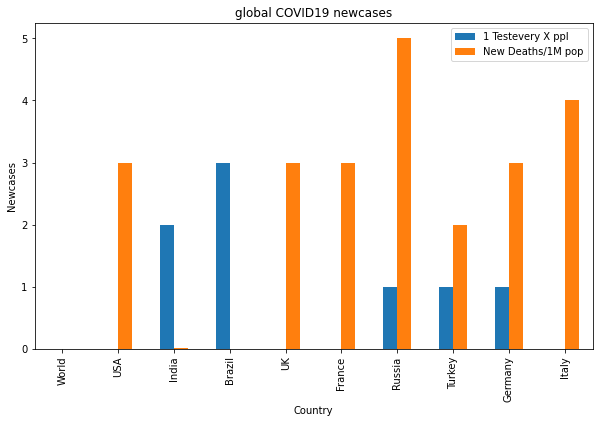

In [131]:
df4.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Country') # add to x-label to the plot
plt.ylabel('Newcases') # add y-label to the plot
plt.title('global COVID19 newcases') # add title to the plot

plt.show()

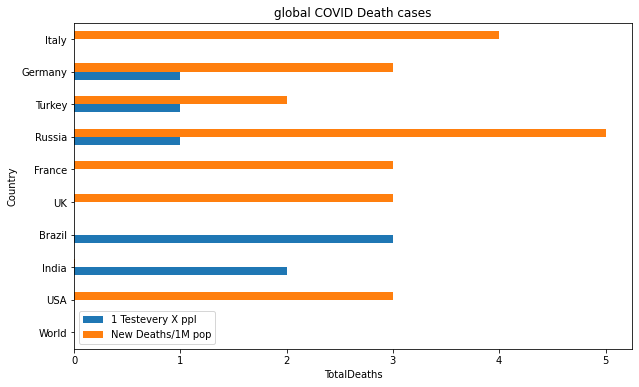

In [132]:
df4.plot(kind='barh', figsize=(10,6))
plt.title('global COVID Death cases')
plt.xlabel('TotalDeaths')
plt.ylabel('Country')
plt.show()
